In [328]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets, metrics
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
from array import array
from keras.utils import to_categorical
from keras.utils import np_utils
from sklearn.mixture import GMM
#from data_handle import * 

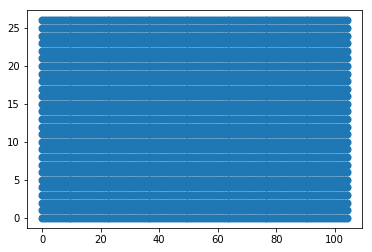

In [333]:
rem_pci = pd.read_csv("pci_result_test.csv")
#rem_pci = pd.read_csv("rem_pci_train_pd.csv")
rem_test = pd.read_csv("rem_test_pd.csv")
rem_pci_np = np.genfromtxt('rem_pci_train.csv', delimiter=',')
rem_pci.head()
plt.scatter(rem_pci['x'], rem_pci['y'], s=50);

In [285]:
def group(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_median = rem_pci.groupby(['X','Y']).median()
    group_drift = rem_pci.groupby(['X','Y']).transform(lambda x: x - x.mean())
    return group_median,group_drift

In [286]:
def group_pcimap(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_median = rem_pci.groupby(['x','y']).median()
    group_drift = rem_pci.groupby(['x','y']).transform(lambda x: x - x.mean())
    return group_median,group_drift

        x   y  pci        dis  kmeans
0       0   0   39  69.362928       1
1       1   0   39  68.379717       1
2       2   0   39  67.397001       1
3       3   0   39  66.414800       1
4       4   0   39  65.433139       1
5       5   0   39  64.452042       1
6       6   0   39  63.471535       1
7       7   0   39  62.491645       1
8       8   0   39  61.512403       1
9       9   0   39  60.533839       1
10     10   0   39  59.555988       1
11     11   0   37  18.685466       2
12     12   0   37  17.985179       2
13     13   0   37  17.314348       2
14     14   0   37  16.676530       2
15     15   0   37  16.075654       2
16     16   0   37  15.516013       2
17     17   0   37  15.002222       2
18     18   0   37  14.539142       2
19     19   0   37  14.131761       2
20     20   0   37  13.785016       2
21     21   0   37  13.503579       2
22     22   0   37  13.291601       2
23     23   0   37  13.152439       2
24     24   0   37  13.088417       2
25     25   

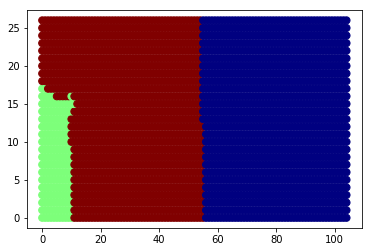

In [334]:
group_median,group_drift = group_pcimap(rem_pci)
#group_median,group_drift = group(rem_test)
kmeans = KMeans(n_clusters=3)
np.savetxt('group_median.csv', group_median, delimiter=',', fmt='%f')
#group_median = pd.read_csv("group_median.csv")
#print(rem_pci['pci'])

kmeans_fit = kmeans.fit(rem_pci)
y_kmeans = kmeans.predict(rem_pci)
#print(y_kmeans)
#print(y_kmeans.shape)

#print(y_kmeans_pd)

#add_kmeans = pd.merge(rem_pci,y_kmeans_pd, left_index=True, right_index=True)
#print(add_kmeans)
#add_kmeans.to_csv('add_kmeans.csv')
#print(group_median)

plt.scatter(rem_pci['x'], rem_pci['y'], s=50, c=y_kmeans, cmap='jet');
y_kmeans_pd = pd.DataFrame({'kmeans':y_kmeans})
add_kmeans = pd.merge(rem_pci,y_kmeans_pd, left_index=True, right_index=True)
print(add_kmeans)
add_kmeans.to_csv('aaa.csv')
#y_kmeans = np.reshape(y_kmeans, (27, 105))
#np.savetxt('y_kmeans.csv', y_kmeans, delimiter=',', fmt='%f')
cluster_labels = kmeans_fit.labels_
silhouette_avg = metrics.silhouette_score(rem_pci, cluster_labels)
print(silhouette_avg)

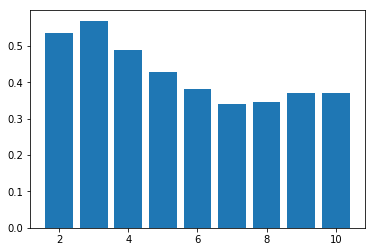

[0.5363659113320257, 0.569352408788066, 0.4892555035903094, 0.429430477361621, 0.38091312358406115, 0.3405972532668949, 0.34641132903197747, 0.37054773919445905, 0.37127569582668646]


In [325]:
# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(rem_pci)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(rem_pci, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multiv

[1 1 1 ... 4 4 4]


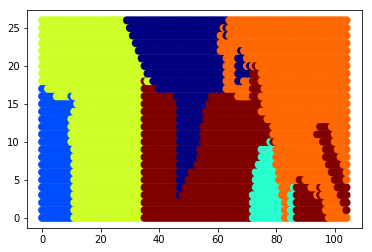

In [346]:
gmm = GMM(n_components=6).fit(rem_pci)
labels = gmm.predict(rem_pci)
plt.scatter(rem_pci['x'], rem_pci['y'], s=50, c=labels, cmap='jet');
print (labels)

In [336]:
def group_kmeans(add_kmeans):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    kmeans = add_kmeans.groupby(['x','y','kmeans']).median()
    return kmeans

In [348]:
def convert_location_data(x, y) :
    '''
    lng = a * x1 - b * y2 + c 
    lat = a * x2 + b * y1 + d

    NEMO -> indoor position value
    (840, -351) -> (96.824, 0)
    (923, -179) -> (107.068, 15.874)
    '''
    a = 0.1185
    b = -0.003
    c = -1.81
    d = 39.842
 
    lng = a * x - b * y * (-1) + c - 4
    lat = a * y * (-1) + b * x + d - 0.5

    return lng, lat
'''
kmeans = group_kmeans(add_kmeans)
#print(kmeans)
z = kmeans
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
z = np.reshape(z, (y_resolution, x_resolution))
'''
#print(add_kmeans.loc[range(10),'kmeans'])
kmeans_0_append = pd.DataFrame(columns=['x','y'])
kmeans_1_append = pd.DataFrame(columns=['x','y'])
kmeans_2_append = pd.DataFrame(columns=['x','y'])
kmeans_3_append = pd.DataFrame(columns=['x','y'])
kmeans_4_append = pd.DataFrame(columns=['x','y'])
for i in range(len(add_kmeans)):
    if add_kmeans.loc[i,'kmeans'] == 0:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_0_append = kmeans_0_append.append(kmeans_merge)
    if add_kmeans.loc[i,'kmeans'] == 1:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_1_append = kmeans_1_append.append(kmeans_merge)
    if add_kmeans.loc[i,'kmeans'] == 2:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_2_append = kmeans_2_append.append(kmeans_merge)
    if add_kmeans.loc[i,'kmeans'] == 3:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_3_append = kmeans_3_append.append(kmeans_merge)
    if add_kmeans.loc[i,'kmeans'] == 4:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_4_append = kmeans_4_append.append(kmeans_merge)
print (kmeans_0_append)
print (kmeans_1_append)
print (kmeans_2_append)
print (kmeans_3_append)
print (kmeans_4_append)

      x   y
0    56   0
0    57   0
0    58   0
0    59   0
0    60   0
0    61   0
0    62   0
0    63   0
0    64   0
0    65   0
0    66   0
0    67   0
0    68   0
0    69   0
0    70   0
0    71   0
0    72   0
0    73   0
0    74   0
0    75   0
0    76   0
0    77   0
0    78   0
0    79   0
0    80   0
0    81   0
0    82   0
0    83   0
0    84   0
0    85   0
..  ...  ..
0    75  26
0    76  26
0    77  26
0    78  26
0    79  26
0    80  26
0    81  26
0    82  26
0    83  26
0    84  26
0    85  26
0    86  26
0    87  26
0    88  26
0    89  26
0    90  26
0    91  26
0    92  26
0    93  26
0    94  26
0    95  26
0    96  26
0    97  26
0    98  26
0    99  26
0   100  26
0   101  26
0   102  26
0   103  26
0   104  26

[1337 rows x 2 columns]
     x   y
0    0   0
0    1   0
0    2   0
0    3   0
0    4   0
0    5   0
0    6   0
0    7   0
0    8   0
0    9   0
0   10   0
0    0   1
0    1   1
0    2   1
0    3   1
0    4   1
0    5   1
0    6   1
0    7   1
0    8   1


In [241]:
for j in range(y_resolution):
        for i in range(x_resolution) : 
            pci = z[j][i]
            if pci == 37 :#37
                #pci_real = pci_config[0] 
                plt.plot(round(i), round(j), color='blue', marker = 's', markersize=5, alpha=.1)
            elif pci == 38 :#38
                #pci_real = pci_config[1]
                plt.plot(round(i), round(j), color='green', marker = 's', markersize=5, alpha=.1 )
            elif pci == 39 :#39
                #pci_real = pci_config[2]
                plt.plot(round(i), round(j), color='red', marker = 's', markersize=5, alpha=.1 )
            elif pci == 40:#40
                #pci_real = pci_config[3]
                plt.plot(round(i), round(j), color='skyblue', marker = 's', markersize=5, alpha=.1)
            elif pci == 41:#41
                #pci_real = pci_config[4]
                plt.plot(round(i), round(j), color='orange', marker = 's', markersize=5, alpha=.1)
            elif pci == 42:#42
                #pci_real = pci_config[5]
                plt.plot(round(i), round(j), color='deeppink', marker = 's', markersize=5, alpha=.1)
            elif pci == 120:#120
                #pci_real = pci_config[6]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 151:#151
                #pci_real = pci_config[7]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 154:#154
                #pci_real = pci_config[8]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            else :                 
                pci_real = -1
                plt.plot(round(i), round(j), color='white', marker = 's', markersize=5, alpha=.1 )
            result = str(i) + ',' + str(j) + ',' + str(pci) +',' + '\n'
            #f.write(result)  # python will convert \n to os.linesep

#f.close()  # you can omit in most cases as the destructor will call it
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
x, y = convert_location_data (260,215) #37
plt.plot(round(abs(x)), round(abs(y)), color='blue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

#SC1 (199, 151)
#x, y = convert_location_data (199, 868)
x, y = convert_location_data (480, 158) #38
plt.plot(round(abs(x)), round(abs(y)), color='green', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (630, 210) #39
plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='purple', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (710, 275) #40
plt.plot(round(abs(x)), round(abs(y)), color='skyblue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (765, 145) #41
plt.plot(round(abs(x)), round(abs(y)), color='orange', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

x, y = convert_location_data (908, 130) #42
plt.plot(round(abs(x)), round(abs(y)), color='deeppink', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
plt.savefig('test', dpi=200)
plt.show()
#plt.close('all')
#fig_pci = plt.pcolor(np.zeros([26, 106]), vmin=1, vmax=100, cmap='gist_ncar')
#plt.colorbar(heatmap_pci)
#plt.axis([0, 35, 0, 25])
'''
plt.axis('equal')
plt.axis('off')
plt.savefig('pci_map.png')
#plt.show()
'''

KeyError: 0